# Supermart Grocery Sales - EDA

# List of important questions to be answered
1. which category of product is most profitable?
2. Region with highest sales by product
3. which region by state made highest and lowest profit ?
4. Average sales volume for each year? 
5. Any repeating customer?
6. Most dicounted and profitable product category
7. correllation between features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Final_df.csv', index_col=0)
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,Weak of year,Weak of month,Day of week,Day of year,CPI,Diesel_Price,Petrol_Price,Temprature,Day_of_month,holiday
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,...,45,2,Wednesday,312,3.328173,61.523103,72.068095,29.60,8,1
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,...,45,2,Wednesday,312,3.328173,61.523103,72.068095,29.60,8,1
2,OD1323,Yusuf,Oil & Masala,Edible Oil & Ghee,Karur,2016-11-08,South,526,0.23,152.54,...,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1
3,OD1851,Arutra,"Eggs, Meat & Fish",Fish,Bodi,2016-11-08,West,2358,0.24,801.72,...,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1
4,OD2878,Shree,Beverages,Health Drinks,Coimbatore,2016-11-08,South,1409,0.14,211.35,...,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1


In [3]:
df.shape

(9752, 24)

In [4]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State', 'Year',
       'Quarter', 'Month', 'Weak of year', 'Weak of month', 'Day of week',
       'Day of year', 'CPI', 'Diesel_Price', 'Petrol_Price', 'Temprature',
       'Day_of_month', 'holiday'],
      dtype='object')

In [5]:
df['Weak of month'].sample(10)

5865    5
3764    4
9068    5
3415    3
4404    2
5756    1
3959    4
1690    4
8797    1
657     3
Name: Weak of month, dtype: int64

In [6]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Year             0
Quarter          0
Month            0
Weak of year     0
Weak of month    0
Day of week      0
Day of year      0
CPI              0
Diesel_Price     0
Petrol_Price     0
Temprature       0
Day_of_month     0
holiday          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 9751
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9752 non-null   object 
 1   Customer Name  9752 non-null   object 
 2   Category       9752 non-null   object 
 3   Sub Category   9752 non-null   object 
 4   City           9752 non-null   object 
 5   Order Date     9752 non-null   object 
 6   Region         9752 non-null   object 
 7   Sales          9752 non-null   int64  
 8   Discount       9752 non-null   float64
 9   Profit         9752 non-null   float64
 10  State          9752 non-null   object 
 11  Year           9752 non-null   int64  
 12  Quarter        9752 non-null   int64  
 13  Month          9752 non-null   int64  
 14  Weak of year   9752 non-null   int64  
 15  Weak of month  9752 non-null   int64  
 16  Day of week    9752 non-null   object 
 17  Day of year    9752 non-null   int64  
 18  CPI     

In [8]:
pd.options.display.max_columns=50

In [9]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Quarter,Month,Weak of year,Weak of month,Day of week,Day of year,CPI,Diesel_Price,Petrol_Price,Temprature,Day_of_month,holiday
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,4,11,45,2,Wednesday,312,3.328173,61.523103,72.068095,29.60,8,1
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,4,11,45,2,Wednesday,312,3.328173,61.523103,72.068095,29.60,8,1
2,OD1323,Yusuf,Oil & Masala,Edible Oil & Ghee,Karur,2016-11-08,South,526,0.23,152.54,Tamil Nadu,2016,4,11,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1
3,OD1851,Arutra,"Eggs, Meat & Fish",Fish,Bodi,2016-11-08,West,2358,0.24,801.72,Tamil Nadu,2016,4,11,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1
4,OD2878,Shree,Beverages,Health Drinks,Coimbatore,2016-11-08,South,1409,0.14,211.35,Tamil Nadu,2016,4,11,46,2,Tuesday,313,4.948216,57.410000,66.160000,30.11,8,1


In [10]:
df.drop(columns = ['Day_of_month', 'Day of year', 'Weak of month', 'Weak of year', 'Day of week', 'State', 'Month'], inplace=True)

# Exploratory Data Analysis

In [11]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Year,Quarter,CPI,Diesel_Price,Petrol_Price,Temprature,holiday
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,2017,4,3.328173,61.523103,72.068095,29.60,1
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,2017,4,3.328173,61.523103,72.068095,29.60,1
2,OD1323,Yusuf,Oil & Masala,Edible Oil & Ghee,Karur,2016-11-08,South,526,0.23,152.54,2016,4,4.948216,57.410000,66.160000,30.11,1
3,OD1851,Arutra,"Eggs, Meat & Fish",Fish,Bodi,2016-11-08,West,2358,0.24,801.72,2016,4,4.948216,57.410000,66.160000,30.11,1
4,OD2878,Shree,Beverages,Health Drinks,Coimbatore,2016-11-08,South,1409,0.14,211.35,2016,4,4.948216,57.410000,66.160000,30.11,1


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 9751
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9752 non-null   object        
 1   Customer Name  9752 non-null   object        
 2   Category       9752 non-null   object        
 3   Sub Category   9752 non-null   object        
 4   City           9752 non-null   object        
 5   Order Date     9752 non-null   datetime64[ns]
 6   Region         9752 non-null   object        
 7   Sales          9752 non-null   int64         
 8   Discount       9752 non-null   float64       
 9   Profit         9752 non-null   float64       
 10  Year           9752 non-null   int64         
 11  Quarter        9752 non-null   int64         
 12  CPI            9752 non-null   float64       
 13  Diesel_Price   9752 non-null   float64       
 14  Petrol_Price   9752 non-null   float64       
 15  Temprature     9752 n

In [14]:
# Most profitable product category
cat_by_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending = False)
cat_by_profit

Category
Eggs, Meat & Fish    553806.92
Snacks               549158.06
Fruits & Veggies     518782.18
Food Grains          516087.25
Bakery               514718.20
Beverages            513205.68
Oil & Masala         485214.55
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category'>

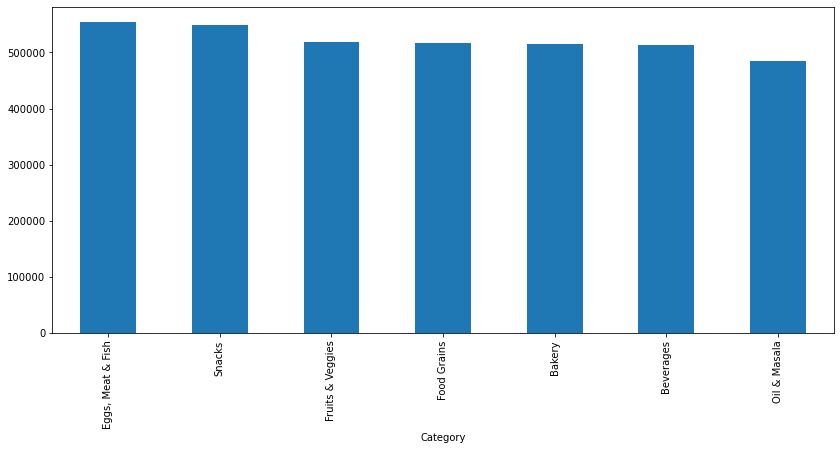

In [15]:
fig,ax = plt.subplots(figsize = (10, 4))
cat_by_profit.plot(kind = "bar", figsize = (14,6), ax= ax)

In [16]:
# Region with the highest sales by product category
rhs = df.loc[:,["Region","Category","Sales"]].pivot_table(index = "Region", columns ="Category", values ="Sales", aggfunc= "sum")
rhs

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,441313.0,496795.0,505234.0,459526.0,515825.0,446045.0,539813.0
East,566038.0,562560.0,660083.0,583175.0,558327.0,609431.0,604560.0
North,NaN,NaN,NaN,NaN,NaN,1254.0,NaN
South,345073.0,332748.0,357992.0,343526.0,335577.0,283702.0,358036.0
West,702189.0,645526.0,686953.0,679447.0,642099.0,651214.0,668213.0


<AxesSubplot:xlabel='Region'>

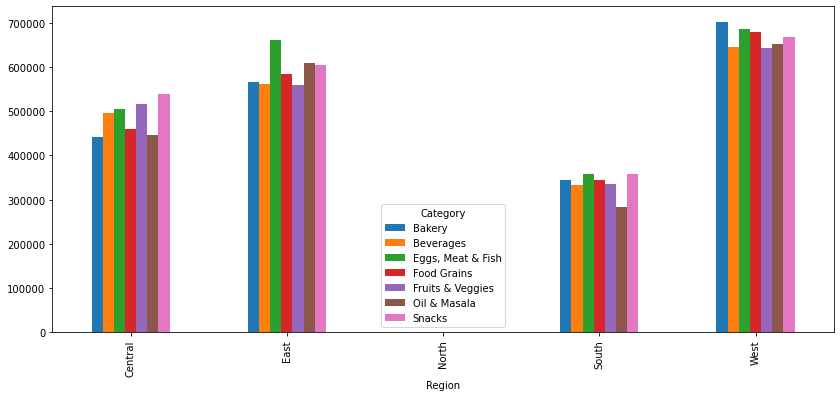

In [17]:
fig,ax = plt.subplots(figsize = (10, 4))
rhs.plot(kind = "bar", figsize = (14,6), ax= ax)

In [18]:
# Region with the highest sales
Reg=df.groupby(['Region'])['Sales'].sum().sort_values(ascending = False)
Reg

Region
West       4675641
East       4144174
Central    3404551
South      2356654
North         1254
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Region'>

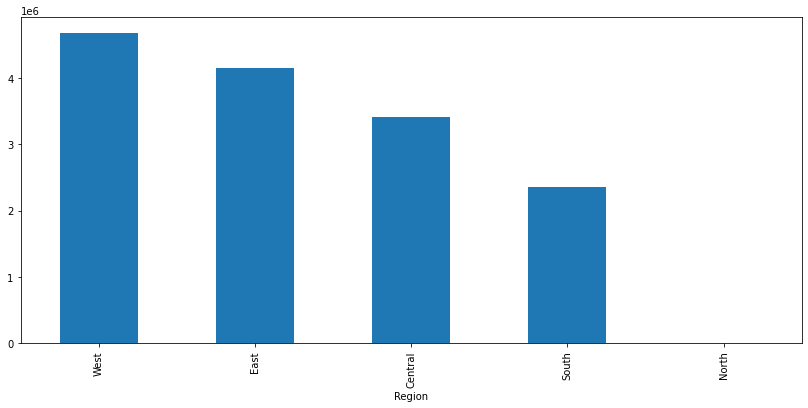

In [19]:
fig,ax = plt.subplots(figsize = (10, 4))
Reg.plot(kind = "bar", figsize = (14,6), ax= ax)

In [20]:
df['Region'].value_counts()

West       3120
East       2785
Central    2281
South      1565
North         1
Name: Region, dtype: int64

In [21]:
#Average sales volume for each year?
Yearly_Profit =df.groupby(['Year'])['Profit'].sum().sort_values(ascending = False)
Yearly_Profit

Year
2018    1244182.88
2017     920532.90
2016     797192.99
2015     689064.07
Name: Profit, dtype: float64

In [22]:
# Average Yearly Profit
Yearly_Profit.mean()

912743.2099999997

array([<AxesSubplot:ylabel='Profit'>], dtype=object)

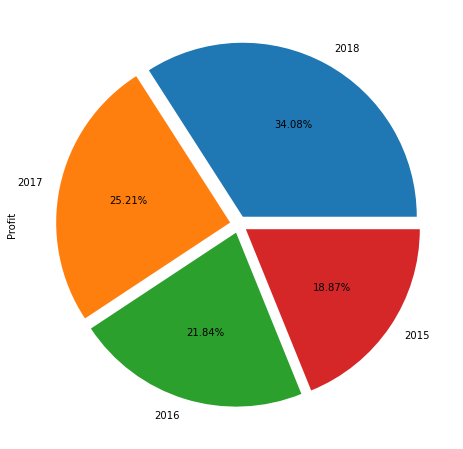

In [23]:
Yearly_Profit.plot(kind = "pie", subplots = True, figsize =(8,8),autopct = "%1.2f%%", explode = [0.05,0.05,0.05,0.05])

In [24]:
#Top ten customers by number of orders

df['Customer Name'].value_counts(ascending = False).head(10)

Amrish      220
Krithika    217
Arutra      213
Verma       213
Vidya       212
Shah        210
Suresh      207
Hussain     207
Surya       205
Sudeep      203
Name: Customer Name, dtype: int64

In [25]:
# Top ten customers based on total sales
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(10)

Customer Name
Amrish      324960
Verma       324881
Krithika    320700
Arutra      318133
Vidya       314818
Vinne       314040
Shah        308356
Suresh      307810
Adavan      307200
Surya       306230
Name: Sales, dtype: int64

In [26]:
# most discounted products

discounted_prod = df.groupby("Category")["Discount"].sum().sort_values(ascending = False)
discounted_prod

Category
Eggs, Meat & Fish    330.67
Snacks               328.02
Fruits & Veggies     317.16
Beverages            315.80
Food Grains          311.91
Bakery               310.00
Oil & Masala         298.64
Name: Discount, dtype: float64

In [27]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Year,Quarter,CPI,Diesel_Price,Petrol_Price,Temprature,holiday
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,2017,4,3.328173,61.523103,72.068095,29.60,1
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,2017,4,3.328173,61.523103,72.068095,29.60,1
2,OD1323,Yusuf,Oil & Masala,Edible Oil & Ghee,Karur,2016-11-08,South,526,0.23,152.54,2016,4,4.948216,57.410000,66.160000,30.11,1
3,OD1851,Arutra,"Eggs, Meat & Fish",Fish,Bodi,2016-11-08,West,2358,0.24,801.72,2016,4,4.948216,57.410000,66.160000,30.11,1
4,OD2878,Shree,Beverages,Health Drinks,Coimbatore,2016-11-08,South,1409,0.14,211.35,2016,4,4.948216,57.410000,66.160000,30.11,1


In [28]:
Yearly_Sales =df.groupby(['Year'])['Sales'].sum().to_frame()
Yearly_Sales

,Sales
Year,
2015,2733873
2016,3131959
2017,3738930
2018,4977512


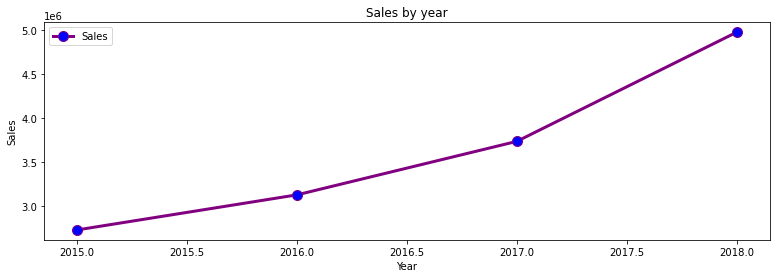

In [29]:
#sns.lineplot(data=Yearly_Sales, x='Year', y='Sales')

fig,ax = plt.subplots(figsize = (13, 4))
Yearly_Sales.plot(kind = "line", ax= ax, color =["purple"], marker ='o',markersize = 10,markerfacecolor='blue',linewidth =3, ylabel =\
     "Sales", title = "Sales by year" );

<AxesSubplot:>

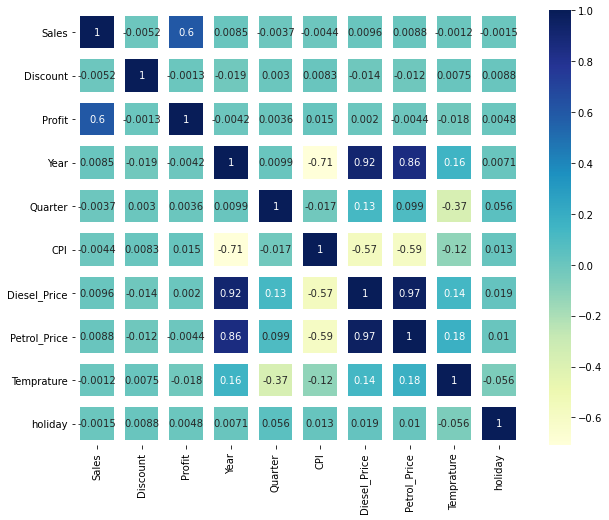

In [30]:

fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), annot= True, linewidths=10, cmap='YlGnBu', ax=ax)

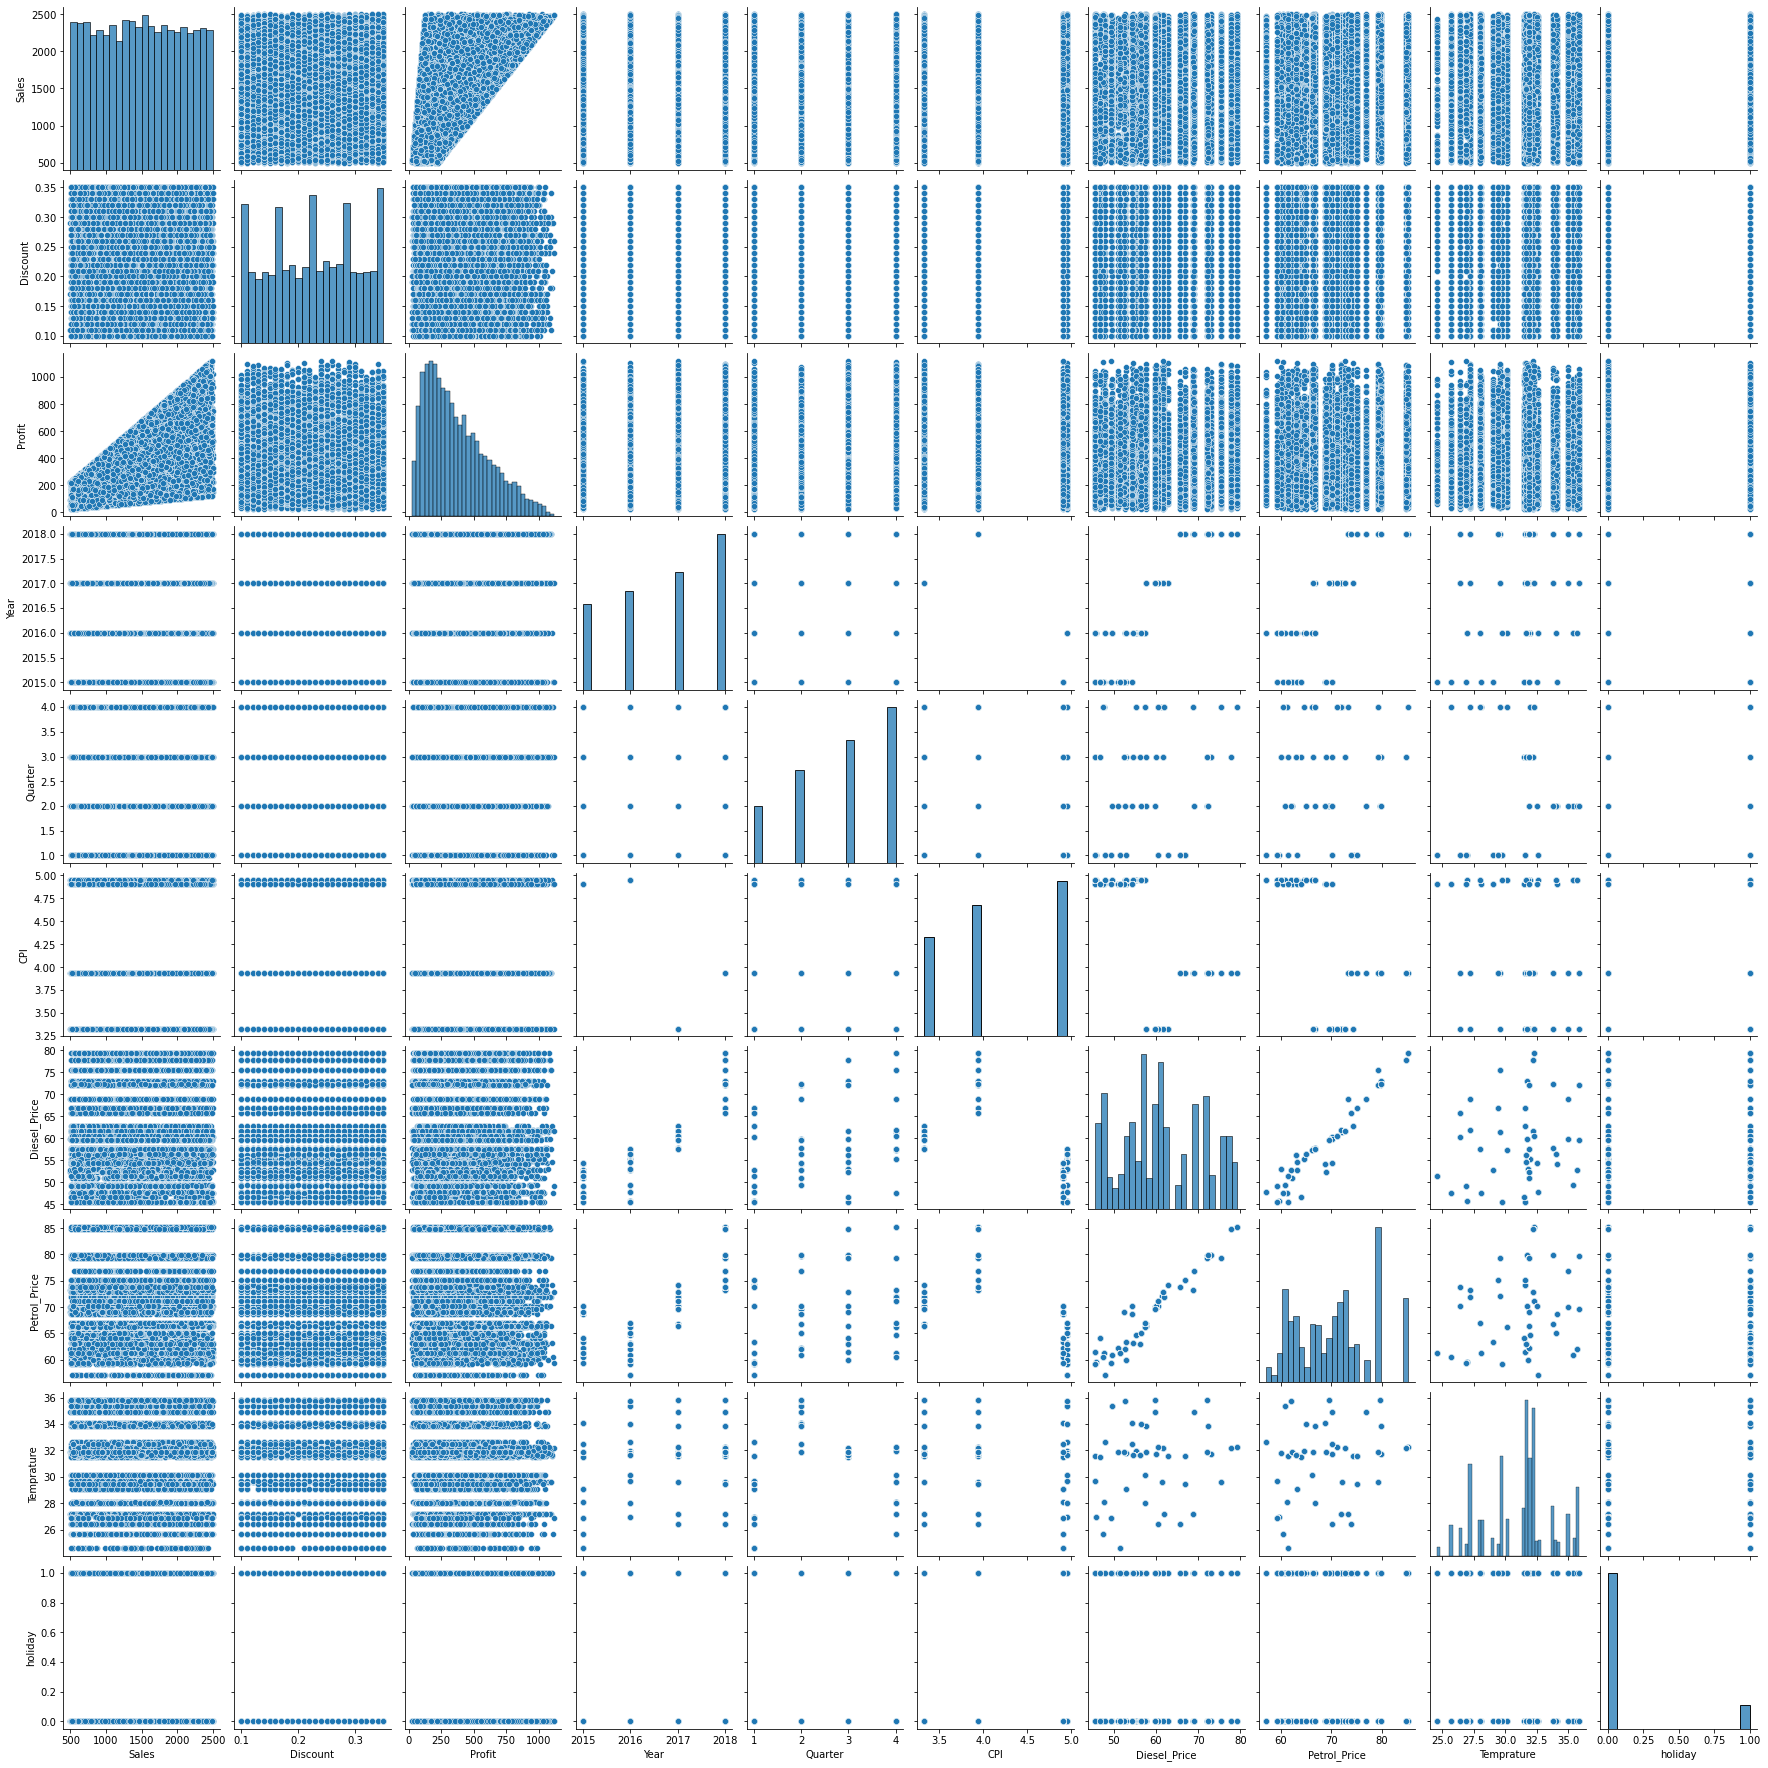

In [31]:
sns.pairplot(df)

In [34]:
df.to_csv('Updated_final_df.csv')